<a href="https://colab.research.google.com/github/Tawfique07/CSE_AI_2024_Assignment_3/blob/main/CSE_AI_2024_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Defining Function to normalize Array between -1 and 1




In [ ]:
def normalize(arr):
  max_val = np.max(arr)
  min_val = np.min(arr)

  # Normalize the array between -1 and 1
  return (2 * (arr - min_val) / (max_val - min_val)) - 1


# Creating The Model

In [ ]:
actv_func = 'relu'

inputs = Input((1,))
h1_layer = Dense(32, activation = actv_func)(inputs)
h2_layer = Dense(64, activation = actv_func)(h1_layer)
h3_layer = Dense(128, activation = actv_func)(h2_layer)
outputs = Dense(1, name = 'OutputLayer')(h3_layer)

model = Model(inputs, outputs, name = 'DNN')
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_102 (Dense)           (None, 32)                64        
                                                                 
 dense_103 (Dense)           (None, 64)                2112      
                                                                 
 dense_104 (Dense)           (None, 128)               8320      
                                                                 
 OutputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Creating Dataset

In [ ]:

x = np.random.randint(-20, 20, 10000)
y = 5 * x**3 - 8 * x**2 - 7 * x + 1

x_data, y_data = normalize(x), normalize(y)


# Splitting dataset into training and test set

In [ ]:
data_len = len(x_data)

#Train data
x_train, y_train = x_data[:int(data_len*0.9)] , y_data[:int(data_len*0.9)]

#Validation data
x_validation, y_validation = x_data[int(data_len*0.9):int(data_len*0.95)] , y_data[int(data_len*0.9):int(data_len*0.95)]

#Test data
x_test , y_test = x_data[int(data_len*0.95):], y_data[int(data_len*0.95):]


# Train the Model

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score(name='accuracy')])

#Train the model
trained_model = model.fit(x_train, y_train, epochs = 50,  validation_data=(x_validation, y_validation), verbose = 0)


# History of the Trained Model

In [ ]:
history = trained_model.history

# Ploting The Result

16/16 [==============================] - 0s 2ms/step - loss: 1.7377e-06 - accuracy: 1.0000
Test Loss: 0.0000017
Test Accuracy: 99.99903%
16/16 [==============================] - 0s 2ms/step


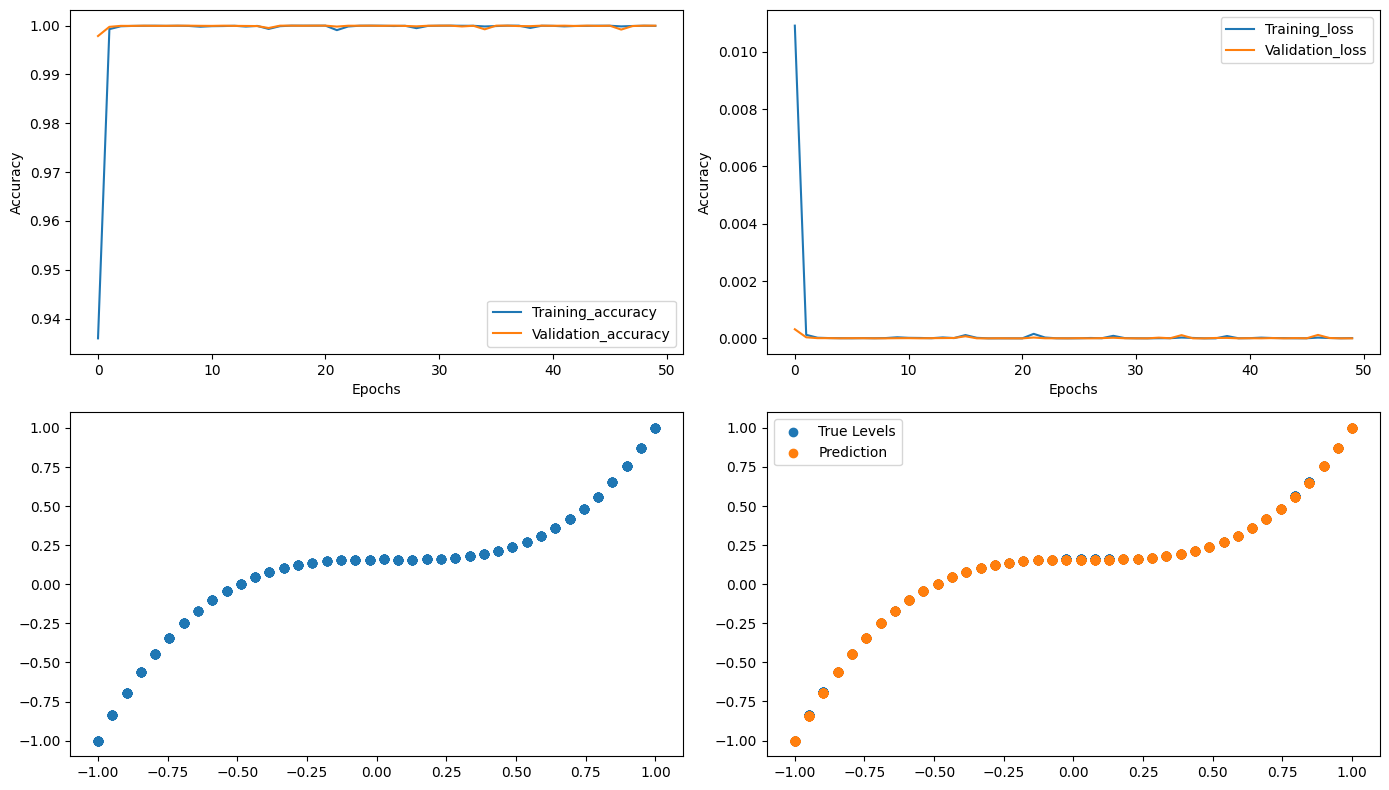

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validation_loss'])

# plot
plt.subplot(2,2,3)
plt.scatter(x_test,y_test)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")
# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs true levels
plt.subplot(2,2,4)
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.legend(['True Levels','Prediction'])
plt.tight_layout()
plt.show()